<a href="https://colab.research.google.com/github/affanahmad528/Hotel-Booking-Analysis/blob/main/Affan_Ahmad_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Here we just import the drive**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path="/content/drive/MyDrive/Share Hotel Bookings.csv"

Hotel_dataframe= pd.read_csv(path)
Hotel_dataframe.head(100)



,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Resort Hotel,1,72,2015,July,27,3,0,2,2,...,No Deposit,240.0,NaN,0,Transient,73.80,0,1,Canceled,2015-06-29
96,Resort Hotel,1,63,2015,July,27,3,2,5,2,...,No Deposit,242.0,NaN,0,Transient,117.00,0,1,Canceled,2015-05-13
97,Resort Hotel,0,63,2015,July,27,3,2,5,3,...,No Deposit,105.0,NaN,0,Transient,196.54,0,1,Check-Out,2015-07-10
98,Resort Hotel,0,101,2015,July,27,3,2,5,2,...,No Deposit,240.0,NaN,0,Transient,99.30,1,2,Check-Out,2015-07-10


In [ ]:
Hotel_dataframe.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


#      Creating copy of Hotel_dataframe


In [ ]:
copy_df = Hotel_dataframe.copy()


# Data Cleaning

**1)Removing the Dublicate data from Data frame**

In [ ]:
copy_df[copy_df.duplicated()].shape                       

(31994, 32)

In [ ]:
copy_df.drop_duplicates(inplace = True)
copy_df.shape                                                              

(87396, 32)

**2)Hanling Missing Values**


In [ ]:
 copy_df.isnull().sum().sort_values(ascending = True)                              

hotel                                 0
total_of_special_requests             0
required_car_parking_spaces           0
adr                                   0
customer_type                         0
days_in_waiting_list                  0
deposit_type                          0
booking_changes                       0
assigned_room_type                    0
reserved_room_type                    0
previous_bookings_not_canceled        0
previous_cancellations                0
is_repeated_guest                     0
reservation_status                    0
distribution_channel                  0
reservation_status_date               0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0
stays_in_weekend_nights               0
arrival_date_day_of_month             0
market_segment                        0
is_canceled                           0
arrival_date_week_number              0


Here are some columns having Null values we need to remove all these values

In [ ]:
copy_df[['company','agent']] = copy_df[['company','agent']].fillna(0)

copy_df['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

This column 'children' has 0 as value which means 0 children were present in group of customers who made that transaction. \ So, 'nan' values are the missing values due to error of recording data. \ \ We will replace the null values under this column with mean value of children.


In [ ]:
copy_df['children'].fillna(copy_df['children'].mean(), inplace = True)

copy_df["country"].fillna('others', inplace=True)   
copy_df.isnull().sum().sort_values(ascending = True)   



hotel                             0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
company                           0
agent                             0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
market_segment                    0
country                           0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number          0
arrival_date_month                0
arrival_date_year           

**All null data are removed from the data**

**3)converting some columns data type into int**


In [ ]:
copy_df[['children', 'company', 'agent']] = copy_df[['children', 'company', 'agent']].astype('int64')

# changing datatype of column 'reservation_status_date' to data_type.
copy_df['reservation_status_date'] = pd.to_datetime(copy_df['reservation_status_date'], format = '%Y-%m-%d')

**4)Adding Some new columns will be required in code**

In [ ]:
# Adding total staying days in hotels
copy_df['total_stay'] = copy_df['stays_in_weekend_nights']+copy_df['stays_in_week_nights']

# Adding total people num as column, i.e. total people num = num of adults + children + babies
copy_df['total_people'] = copy_df['adults']+copy_df['children']+copy_df['babies']


#  Hotel Booking Analysis 

Q1) Which meal type is most preffered meal of customers?

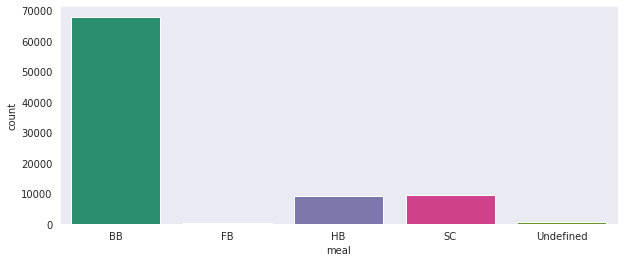

In [ ]:
import seaborn as sns
#sns.set(style="dark")

plt.figure( figsize=(10, 4))

sns.countplot(x = 'meal', data=copy_df, color= 'red',palette = 'Dark2' )
plt.show()

From this question we can take a result that most common type of meal is BB and Least common is undefined.

Q2)Obtain the reservations of City Hotels vs Resort Hotel

Text(0, 0.5, 'Reservation count')

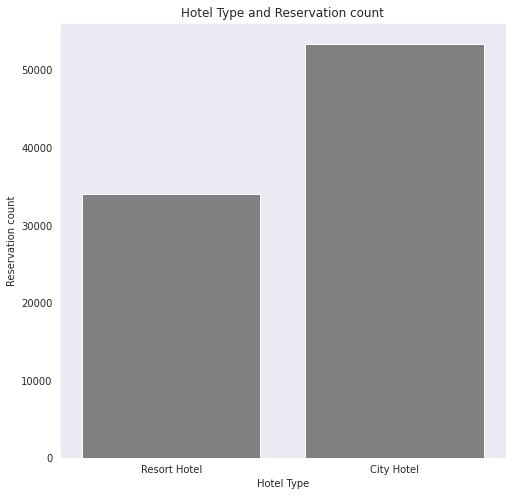

In [ ]:
plt.figure( figsize=(8, 8))
graph = sns.countplot(x="hotel", data=copy_df, color ='grey')
#sns.set_style("dark")
graph.set(title="Hotel Type and Reservation count")
graph.set_xlabel("Hotel Type")
graph.set_ylabel("Reservation count")


  

The reservation of city hotel is aound 60000 which more the reservation of Resort Hotel, so from this we can conclude that most people preffered city hotel.

Q3)Obtain Hotel type and the number of cancellations or non canllations

Text(0, 0.5, 'Reservation count')

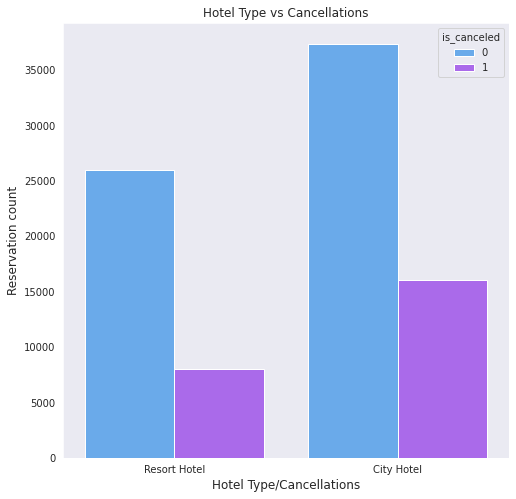

In [ ]:
plt.figure( figsize=(8, 8))
#c =['blue',"red"]
graph = sns.countplot(x="hotel", hue= 'is_canceled', data =copy_df, palette= 'cool')  
graph.set(title="Hotel Type vs Cancellations")
graph.set_xlabel("Hotel Type/Cancellations", fontsize=12)
graph.set_ylabel("Reservation count", fontsize=12)

from this graph we can conclude that city hotel has more cancellations then resort hotel

:Q4) find the number of arrivals each year in resort hotel and city hotel.

Text(0, 0.5, 'Count')

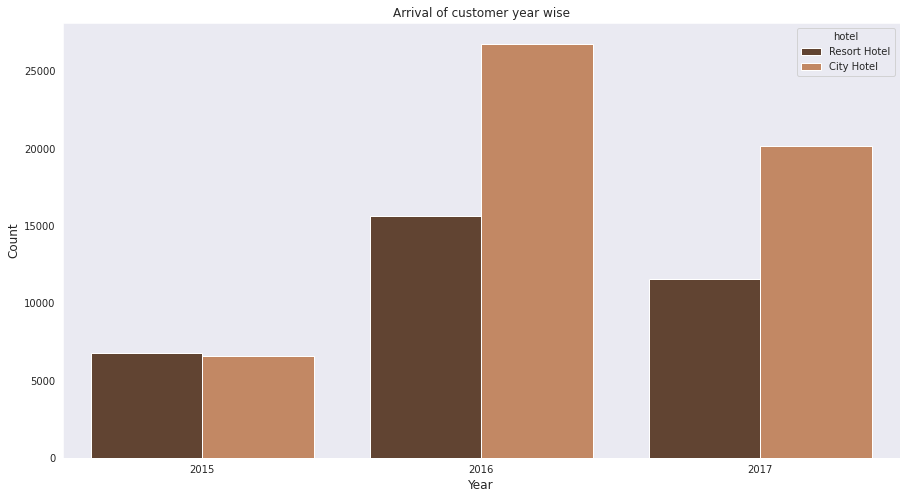

In [ ]:

plt.figure( figsize=(15, 8))           
#c =['blue',"red"]
graph = sns.countplot(x="arrival_date_year",
                      hue= 'hotel', 
                      data =copy_df,palette = 'copper')
                      #order=['January','Febraury','March',"April","May",'June','July',"August",'September',"October","November","December"])  
#sns.set_style("dark")
graph.set(title="Arrival of customer year wise")
graph.set_xlabel("Year", fontsize=12)
graph.set_ylabel("Count", fontsize=12)

From above graph we can conclude that in year 2016 there was most number of custmers visit in the city hotel and in year 2015 there was least customer visits in resort hotel ie around 8000 only. 

Q5) Obtain the number of Adults reserving , and the number of Families with children reserving 

Text(0, 0.5, 'Reservation count')

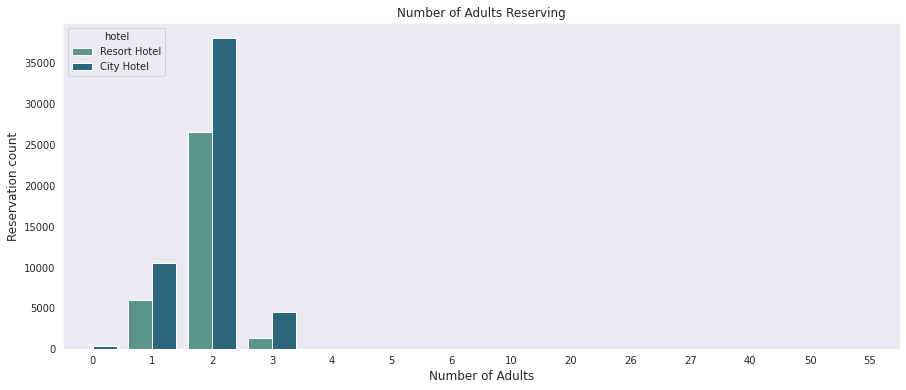

In [ ]:
plt.figure( figsize=(15, 6))
#c =['blue',"red"]
graph = sns.countplot(x="adults", hue= 'hotel', data =copy_df, palette = 'crest')  
#sns.sexlat_style("dark")
graph.set(title="Number of Adults Reserving")
graph.set_xlabel("Number of Adults", fontsize=12)
graph.set_ylabel("Reservation count", fontsize=12)

Text(0, 0.5, 'Reservation count')

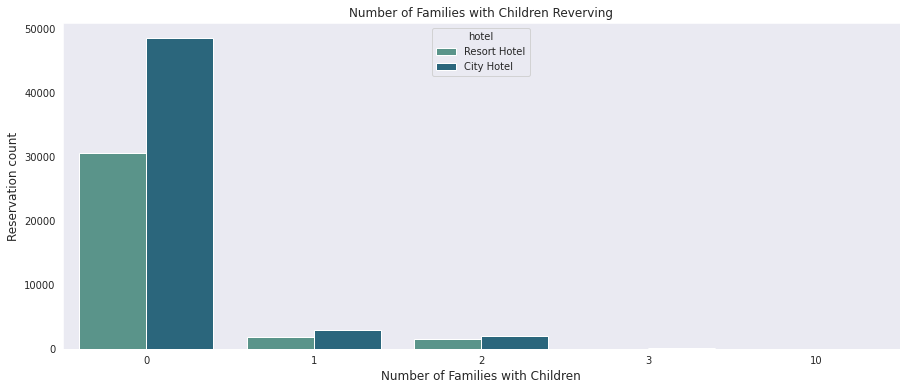

In [ ]:
plt.figure( figsize=(15,6))
#c =['blue',"red"]
graph = sns.countplot(x="children", hue= 'hotel', data =copy_df, palette = "crest")  
graph.set(title="Number of Families with Children Reverving")
graph.set_xlabel("Number of Families with Children", fontsize=12)
graph.set_ylabel("Reservation count", fontsize=12)

From above two Graph we can conclude that number of reservation of Hotel is more when adults are with children

Q6) Find the highest booking cancellations


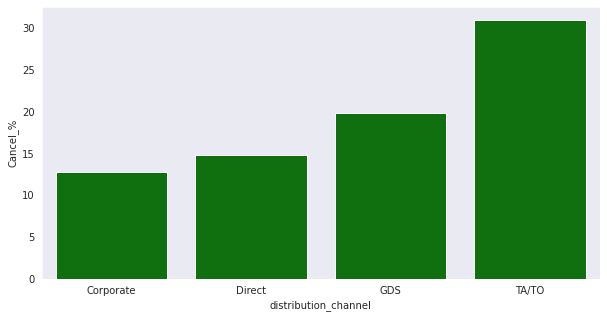

In [ ]:
group_by_dc = copy_df.groupby('distribution_channel')
copy_df = pd.DataFrame((group_by_dc['is_canceled'].sum()/group_by_dc.size())*100).drop(index = 'Undefined').rename(columns = {0: 'Cancel_%'})
plt.figure(figsize = (10,5))
sns.barplot(x = copy_df.index, y = copy_df['Cancel_%'], color='green')
plt.show()

from the above graph we can conclude that highest booking cancellation is from distrubution_channel TA/To has which is more then 30% and lowest cancellation is around 13% which is from corporation channel 